In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn import  preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [29]:
df_train = pd.read_csv('har_dataset.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [30]:
df_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [31]:
df_train.shape

(7352, 563)

In [32]:
df_train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [33]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

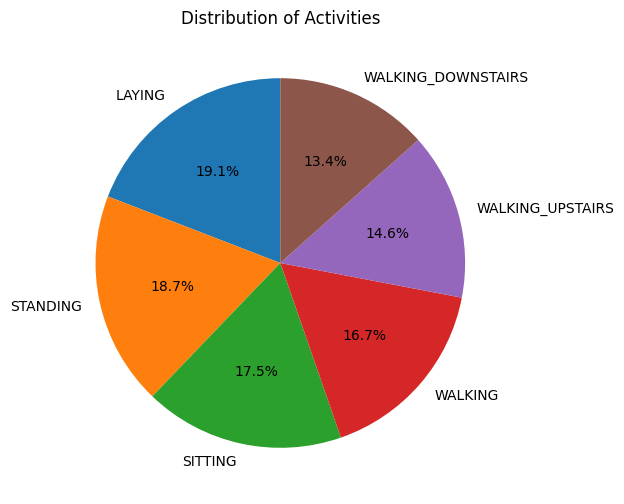

In [34]:
activity_counts = df_train['Activity'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Activities')
plt.show()

In [35]:
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

In [36]:
X = df_train.drop(['Activity', 'subject'], axis=1)
y = df_train['Activity'].values

print(np.unique(df_train.Activity.values, return_counts=True))

print("X shape: ", X.shape)
print("y shape: ", y.shape)

(array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object), array([1407, 1286, 1374, 1226,  986, 1073], dtype=int64))
X shape:  (7352, 561)
y shape:  (7352,)


In [37]:
X.shape, y.shape

((7352, 561), (7352,))

In [38]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [39]:
y[5]

'STANDING'

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [41]:
num_cols = X._get_numeric_data().columns
print("Number of numeric features:", num_cols.size) 

Number of numeric features: 561


In [42]:
y.shape

(7352,)

In [43]:
y[5]

'STANDING'

In [44]:
scaler = StandardScaler()

In [45]:
X = scaler.fit_transform(X)
X[5]

array([ 0.03858209,  0.18617977,  0.07069885, -0.87339677, -0.95411711,
       -0.93313903, -0.86574842, -0.95349268, -0.94036321, -0.87026043,
       -0.91998157, -0.90402636,  0.89541301,  0.89700694,  0.84469288,
       -0.94612447, -0.69318798, -0.77564852, -0.69439636, -0.84298608,
       -0.93680911, -0.94257428, -1.38374823, -0.72462795, -1.04200642,
        1.65309439, -1.15596785,  0.8067426 ,  0.24705658,  1.11195951,
       -1.25380495,  1.25355661, -1.80151132,  1.91931057, -1.16349834,
        0.54422583,  0.68557071, -0.23365888,  0.12908098,  0.19571523,
        0.58798114, -0.42775638, -0.00578131, -0.44178683, -0.36158497,
       -0.56325767, -0.43948269, -0.35273651, -0.55726241,  0.56764117,
       -0.45408023, -0.0454745 ,  0.60795131, -0.39241834,  0.03841345,
       -0.82551143,  0.68035779, -0.54218921, -0.5518713 , -0.43341776,
       -0.32788833, -0.53895791, -0.91072978, -0.46503661, -0.79529628,
        0.99972428, -0.83832088,  0.6428776 , -0.42587111,  0.50

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)


In [47]:
X_train.shape, X_test.shape, y_train.shape

((5881, 561), (1471, 561), (5881,))

In [48]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted', zero_division=1)

    return accuracy, precision


In [49]:
models = {
    "default SVM": SVC(),
    "rbf 100.0": SVC(kernel='rbf',C=100.0),
    "linear 100.0": SVC(kernel='linear',C=100.0),
    "linear 1.0": SVC(kernel='linear',C=1.0)
}

list_of_model = []
accuracy_list =[]
precision_list = []

In [50]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    y_test_pred = model.predict(X_test)

    model_test_accuracy , model_test_precision = evaluate_model(y_test, y_test_pred)

    list_of_model.append(list(models.keys())[i])

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))

    accuracy_list.append(model_test_accuracy)
    precision_list.append(model_test_precision)
    
    print('='*35)
    print('\n')


y_test_pred ['LAYING' 'WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' ... 'WALKING'
 'WALKING' 'WALKING']
----------------------------------
Model performance for Test set
- Accuracy: 0.9748
- Precision: 0.9748


y_test_pred ['LAYING' 'WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' ... 'WALKING'
 'WALKING' 'WALKING']
----------------------------------
Model performance for Test set
- Accuracy: 0.9884
- Precision: 0.9885


y_test_pred ['LAYING' 'WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' ... 'WALKING'
 'WALKING' 'WALKING']
----------------------------------
Model performance for Test set
- Accuracy: 0.9844
- Precision: 0.9844


y_test_pred ['LAYING' 'WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' ... 'WALKING'
 'WALKING' 'WALKING']
----------------------------------
Model performance for Test set
- Accuracy: 0.9850
- Precision: 0.9850




In [51]:
result_df = pd.DataFrame(list(zip(list_of_model, accuracy_list)), columns=['Algorithm_Type', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"],ascending=False)
print(result_df)

  Algorithm_Type  Accuracy_Score
1      rbf 100.0        0.988443
3     linear 1.0        0.985044
2   linear 100.0        0.984364
0    default SVM        0.974847


In [53]:
res_df = pd.DataFrame(list(zip(list_of_model, precision_list)), columns=['Algorithm_Type', 'Precision_Score']).sort_values(by=["Precision_Score"],ascending=False)
print(res_df)

  Algorithm_Type  Precision_Score
1      rbf 100.0         0.988452
3     linear 1.0         0.985044
2   linear 100.0         0.984363
0    default SVM         0.974838
